<a href="https://www.kaggle.com/code/sjagkoo7/eda-of-top-500-indian-cities-population?scriptVersionId=132327803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-dataset-of-top-500-indian-cities/cities_r2.csv


#### Questions
*  View the first 6 rows of the data
*  Remove any missing value (i.e, NA values for not available)
*  Min,Max,Mean,mode,standard deviation,correlation 
*  No of cities per state
*  No of district per state
*  Total population per state
*  Total male population per state
*  Total female population per state
*  Total population per city
*  Total number of literates(Male Vs Female)
*  Literacy Rate Comparison(male vs female)
*  Sex ratio Vs child sex ratio
*  Cluster perform
*  Dissimilarity matrix
*  Hierarchical clustering using Ward's method
*  Plot the obtained dendrogram

In [2]:
population=pd.read_csv("/kaggle/input/population-dataset-of-top-500-indian-cities/cities_r2.csv")
population

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


### Data Pre-Processing

In [3]:
population.info()
#population.shape
#len(population)
#len(population.columns)
#population.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [4]:
population.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [5]:
population.isna().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

* Below both done till now.
* View the first 6 rows of the data
* Remove any missing value (i.e, NA values for not available)

#### Co-relation

In [6]:
population_corr=population.corr()

#### Heatmap of Co-relation

<AxesSubplot:>

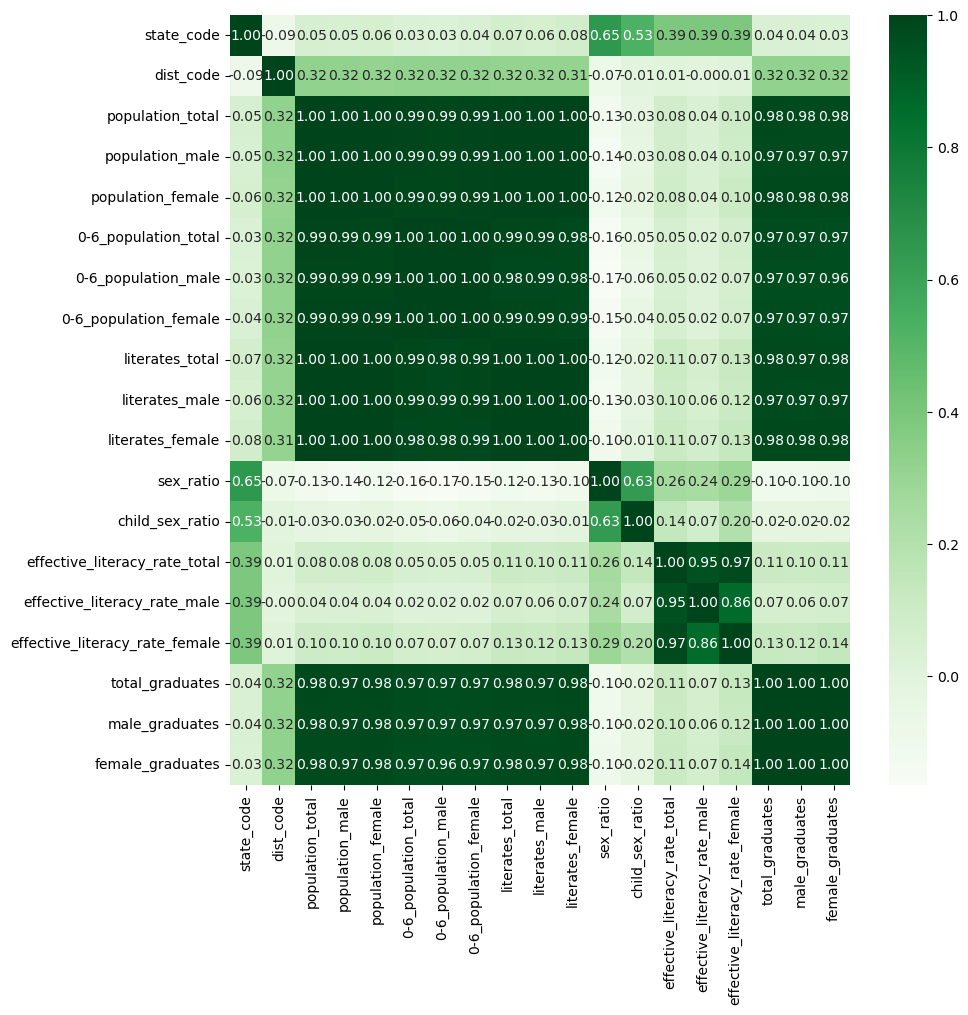

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(population_corr,annot=True,fmt="0.2f",cmap='Greens')

#### No of cities per state

In [8]:
# city_ana=population.groupby(['state_name']).name_of_city.value_counts()
city_ana=population.groupby('state_name').name_of_city.value_counts()
city_ana

state_name                 name_of_city     
ANDAMAN & NICOBAR ISLANDS  Port Blair           1
ANDHRA PRADESH             Adilabad             1
                           Adoni                1
                           Anantapur            1
                           Bhimavaram           1
                                               ..
WEST BENGAL                Siliguri             1
                           South Dum Dum        1
                           Titagarh             1
                           Uluberia             1
                           Uttarpara Kotrung    1
Name: name_of_city, Length: 493, dtype: int64

In [9]:
#city_count_df=population.groupby(['state_name']).name_of_city.count().reset_index()
city_count_df=population.groupby('state_name').name_of_city.count().reset_index()
city_count_df.columns=['state_name','City Count']
city_count_df

,state_name,City Count
0,ANDAMAN & NICOBAR ISLANDS,1
1,ANDHRA PRADESH,42
2,ASSAM,4
3,BIHAR,26
4,CHANDIGARH,1
5,CHHATTISGARH,9
6,GUJARAT,29
7,HARYANA,20
8,HIMACHAL PRADESH,1
9,JAMMU & KASHMIR,3


In [10]:
city_count_df1=population.groupby(['state_name']).name_of_city.count()
city_count_df1

state_name
ANDAMAN & NICOBAR ISLANDS     1
ANDHRA PRADESH               42
ASSAM                         4
BIHAR                        26
CHANDIGARH                    1
CHHATTISGARH                  9
GUJARAT                      29
HARYANA                      20
HIMACHAL PRADESH              1
JAMMU & KASHMIR               3
JHARKHAND                    10
KARNATAKA                    26
KERALA                        7
MADHYA PRADESH               32
MAHARASHTRA                  43
MANIPUR                       1
MEGHALAYA                     1
MIZORAM                       1
NAGALAND                      1
NCT OF DELHI                 15
ORISSA                       10
PUDUCHERRY                    2
PUNJAB                       16
RAJASTHAN                    29
TAMIL NADU                   32
TRIPURA                       1
UTTAR PRADESH                63
UTTARAKHAND                   6
WEST BENGAL                  61
Name: name_of_city, dtype: int64

In [11]:
city_count_df2=pd.DataFrame(columns=['state_name','City Count'])
for items in city_count_df1.items():
    temp=pd.DataFrame({'state_name':[items[0]],'City Count':[items[1]]})
    city_count_df2=city_count_df2.append(temp,ignore_index=True)
city_count_df2

,state_name,City Count
0,ANDAMAN & NICOBAR ISLANDS,1
1,ANDHRA PRADESH,42
2,ASSAM,4
3,BIHAR,26
4,CHANDIGARH,1
5,CHHATTISGARH,9
6,GUJARAT,29
7,HARYANA,20
8,HIMACHAL PRADESH,1
9,JAMMU & KASHMIR,3


#### No of district per state

In [12]:
dist_count_df=population.groupby(['state_name']).dist_code.count().reset_index()
dist_count_df.columns=['state_name','Dist_count']
dist_count_df

,state_name,Dist_count
0,ANDAMAN & NICOBAR ISLANDS,1
1,ANDHRA PRADESH,42
2,ASSAM,4
3,BIHAR,26
4,CHANDIGARH,1
5,CHHATTISGARH,9
6,GUJARAT,29
7,HARYANA,20
8,HIMACHAL PRADESH,1
9,JAMMU & KASHMIR,3


#### Total population per state

In [13]:
tot_pop_df=population.groupby(['state_name']).population_total.sum().reset_index()
tot_pop_df 

,state_name,population_total
0,ANDAMAN & NICOBAR ISLANDS,100608
1,ANDHRA PRADESH,18171615
2,ASSAM,1391154
3,BIHAR,6714516
4,CHANDIGARH,960787
5,CHHATTISGARH,3137918
6,GUJARAT,17835049
7,HARYANA,5952223
8,HIMACHAL PRADESH,169758
9,JAMMU & KASHMIR,1804987


* Total male population per state
* Total female population per state
* Total population per city

In [14]:
#Total male population per state
def tot_male_pop():
    tot_male_pop_df=population.groupby(['state_name']).population_male.sum().reset_index()
    return tot_male_pop_df
tot_male_pop()

,state_name,population_male
0,ANDAMAN & NICOBAR ISLANDS,53247
1,ANDHRA PRADESH,9192368
2,ASSAM,720132
3,BIHAR,3558722
4,CHANDIGARH,525226
5,CHHATTISGARH,1612019
6,GUJARAT,9541688
7,HARYANA,3181968
8,HIMACHAL PRADESH,93364
9,JAMMU & KASHMIR,953292


In [15]:
#Total female population per state
def tot_female_pop():
    tot_female_pop_df=population.groupby(['state_name']).population_female.sum().reset_index()
    return tot_female_pop_df
tot_female_pop()

,state_name,population_female
0,ANDAMAN & NICOBAR ISLANDS,47361
1,ANDHRA PRADESH,8979247
2,ASSAM,671022
3,BIHAR,3155794
4,CHANDIGARH,435561
5,CHHATTISGARH,1525899
6,GUJARAT,8293361
7,HARYANA,2770255
8,HIMACHAL PRADESH,76394
9,JAMMU & KASHMIR,851695


In [16]:
#Total population per city
def tot_city_pop():
    tot_city_pop_df=population[['name_of_city','population_total']]
    return tot_city_pop_df
tot_city_pop()

,name_of_city,population_total
0,Abohar,145238
1,Achalpur,112293
2,Adilabad,117388
3,Adityapur,173988
4,Adoni,166537
...,...,...
488,Vizianagaram,227533
489,Warangal,620116
490,Wardha,105543
491,Yamunanagar,216628


* Total number of literates(Male Vs Female)
* Literacy Rate Comparison(male vs female)
* Sex ratio Vs child sex ratio

In [17]:
# population[['name_of_city','literates_male','literates_female']] #Total number of literates(Male Vs Female)
# population[['name_of_city','sex_ratio','child_sex_ratio']] #Literacy Rate Comparison(male vs female)
population[['name_of_city','effective_literacy_rate_male','effective_literacy_rate_female']] #Sex ratio Vs child sex ratio

,name_of_city,effective_literacy_rate_male,effective_literacy_rate_female
0,Abohar,85.49,73.59
1,Achalpur,94.77,89.00
2,Adilabad,88.18,72.73
3,Adityapur,89.98,76.23
4,Adoni,76.58,60.33
...,...,...,...
488,Vizianagaram,88.18,75.80
489,Warangal,91.54,76.79
490,Wardha,97.19,90.88
491,Yamunanagar,89.61,81.71
